In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the dataset

In [2]:
df_delay = pd.read_csv('combined_data_mkt.csv')
print("Total row and column in the data set is:", df_delay.shape)

Total row and column in the data set is: (7886173, 25)


In [3]:
df_delay

,Year,Month,DayOfWeek,Operating_Airline,Tail_Number,Origin,OriginState,Dest,DestState,DepDelayMinutes,...,TaxiIn,ArrDel15,ArrDelayMinutes,ArrTimeBlk,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,DistanceGroup
0,2018,10,1,9E,N8694A,ATL,GA,EWN,NC,0.0,...,3.0,0.0,2.0,2100-2159,433.0,NaN,NaN,NaN,NaN,2.0
1,2018,10,2,9E,N834AY,ATL,GA,EWN,NC,64.0,...,3.0,1.0,69.0,2100-2159,433.0,23.0,0.0,5.0,0.0,2.0
2,2018,10,3,9E,N8688C,ATL,GA,EWN,NC,0.0,...,6.0,0.0,6.0,2100-2159,433.0,NaN,NaN,NaN,NaN,2.0
3,2018,10,4,9E,N833AY,ATL,GA,EWN,NC,2.0,...,3.0,0.0,13.0,2100-2159,433.0,NaN,NaN,NaN,NaN,2.0
4,2018,10,5,9E,N980EV,ATL,GA,EWN,NC,0.0,...,2.0,0.0,0.0,2100-2159,433.0,NaN,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7886168,2023,4,3,OH,N562NN,BTR,LA,CLT,NC,36.0,...,17.0,1.0,30.0,1000-1059,675.0,30.0,0.0,0.0,0.0,3.0
7886169,2023,4,4,OH,N597NN,BTR,LA,CLT,NC,0.0,...,14.0,0.0,8.0,1000-1059,675.0,NaN,NaN,NaN,NaN,3.0
7886170,2023,4,5,OH,N550NN,BTR,LA,CLT,NC,0.0,...,16.0,0.0,0.0,1000-1059,675.0,NaN,NaN,NaN,NaN,3.0
7886171,2023,4,6,OH,N588NN,BTR,LA,CLT,NC,0.0,...,22.0,0.0,0.0,1000-1059,675.0,NaN,NaN,NaN,NaN,3.0


### 1. Understand the data

In [4]:
label_column = 'ArrDel15'
all_columns = df_delay.columns.tolist()
feature_columns = [col for col in all_columns if col != label_column]

In [5]:
feature_columns

['Year',
 'Month',
 'DayOfWeek',
 'Operating_Airline',
 'Tail_Number',
 'Origin',
 'OriginState',
 'Dest',
 'DestState',
 'DepDelayMinutes',
 'DepDel15',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'ArrDelayMinutes',
 'ArrTimeBlk',
 'Distance',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'DistanceGroup']

In [6]:
df_delay['DistanceGroup'] = df_delay['DistanceGroup'].astype(str)

In [7]:
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

In [8]:
day_mapping = {
    1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'
}

In [9]:
# Apply mappings to Month and DayOfWeek columns
df_delay['Month'] = df_delay['Month'].map(month_mapping)
df_delay['DayOfWeek'] = df_delay['DayOfWeek'].map(day_mapping)

In [10]:
df_delay.drop(columns = ['Year'], inplace=True)

### 2. Clean the data

In [11]:
mean_dep_delay = df_delay['DepDelayMinutes'].mean()
median_taxi_out = df_delay['TaxiOut'].median()
median_taxi_in = df_delay['TaxiIn'].median()
median_wheels_on = df_delay['WheelsOn'].median()
median_wheels_off = df_delay['WheelsOff'].median()

In [12]:
df = df_delay.fillna({'DepDelayMinutes': mean_dep_delay, 'TaxiOut': median_taxi_out, 'TaxiIn': median_taxi_in, 'WheelsOn': median_wheels_on, 'WheelsOff': median_wheels_off})

In [13]:
columns_to_fill = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay']

# Replace null values with 0 in the specified columns
df[columns_to_fill] = df[columns_to_fill].fillna(0)

In [14]:
df['LateAirCraftDelay'] = df[columns_to_fill].apply(lambda row: 1 if all(v == 0 for v in row) else 0, axis=1)

In [15]:
numeric_features = ['DepDelayMinutes','DepDel15','DepTimeBlk','TaxiOut','WheelsOff','WheelsOn',
                    'TaxiIn','ArrDelayMinutes','ArrTimeBlk','Distance','CarrierDelay','WeatherDelay',
                    'NASDelay','SecurityDelay', 'LateAirCraftDelay']

In [16]:
non_numeric_features = ['Month','DayOfWeek','Operating_Airline','Tail_Number',
                        'Origin', 'OriginState', 'Dest', 'DestState', 'DepTimeBlk', 
                        'ArrTimeBlk', 'DistanceGroup']

In [17]:
df = df.dropna(subset=['ArrDel15'])

In [18]:
null_values = df.isnull().sum()

In [19]:
null_values

Month                  0
DayOfWeek              0
Operating_Airline      0
Tail_Number            0
Origin                 0
OriginState            0
Dest                   0
DestState              0
DepDelayMinutes        0
DepDel15             617
DepTimeBlk             0
TaxiOut                0
WheelsOff              0
WheelsOn               0
TaxiIn                 0
ArrDel15               0
ArrDelayMinutes        0
ArrTimeBlk             0
Distance               0
CarrierDelay           0
WeatherDelay           0
NASDelay               0
SecurityDelay          0
DistanceGroup          0
LateAirCraftDelay      0
dtype: int64

In [20]:
df.reset_index(drop=True, inplace=True)

In [21]:
df

,Month,DayOfWeek,Operating_Airline,Tail_Number,Origin,OriginState,Dest,DestState,DepDelayMinutes,DepDel15,...,ArrDel15,ArrDelayMinutes,ArrTimeBlk,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,DistanceGroup,LateAirCraftDelay
0,Oct,Mon,9E,N8694A,ATL,GA,EWN,NC,0.0,0.0,...,0.0,2.0,2100-2159,433.0,0.0,0.0,0.0,0.0,2.0,1
1,Oct,Tue,9E,N834AY,ATL,GA,EWN,NC,64.0,1.0,...,1.0,69.0,2100-2159,433.0,23.0,0.0,5.0,0.0,2.0,0
2,Oct,Wed,9E,N8688C,ATL,GA,EWN,NC,0.0,0.0,...,0.0,6.0,2100-2159,433.0,0.0,0.0,0.0,0.0,2.0,1
3,Oct,Thu,9E,N833AY,ATL,GA,EWN,NC,2.0,0.0,...,0.0,13.0,2100-2159,433.0,0.0,0.0,0.0,0.0,2.0,1
4,Oct,Fri,9E,N980EV,ATL,GA,EWN,NC,0.0,0.0,...,0.0,0.0,2100-2159,433.0,0.0,0.0,0.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7686495,Apr,Wed,OH,N562NN,BTR,LA,CLT,NC,36.0,1.0,...,1.0,30.0,1000-1059,675.0,30.0,0.0,0.0,0.0,3.0,0
7686496,Apr,Thu,OH,N597NN,BTR,LA,CLT,NC,0.0,0.0,...,0.0,8.0,1000-1059,675.0,0.0,0.0,0.0,0.0,3.0,1
7686497,Apr,Fri,OH,N550NN,BTR,LA,CLT,NC,0.0,0.0,...,0.0,0.0,1000-1059,675.0,0.0,0.0,0.0,0.0,3.0,1
7686498,Apr,Sat,OH,N588NN,BTR,LA,CLT,NC,0.0,0.0,...,0.0,0.0,1000-1059,675.0,0.0,0.0,0.0,0.0,3.0,1


## Data Exploration (EDA)

### 1. Numeric features and label

In [22]:
correlation_matrix = df[numeric_features + [label_column]].corr()

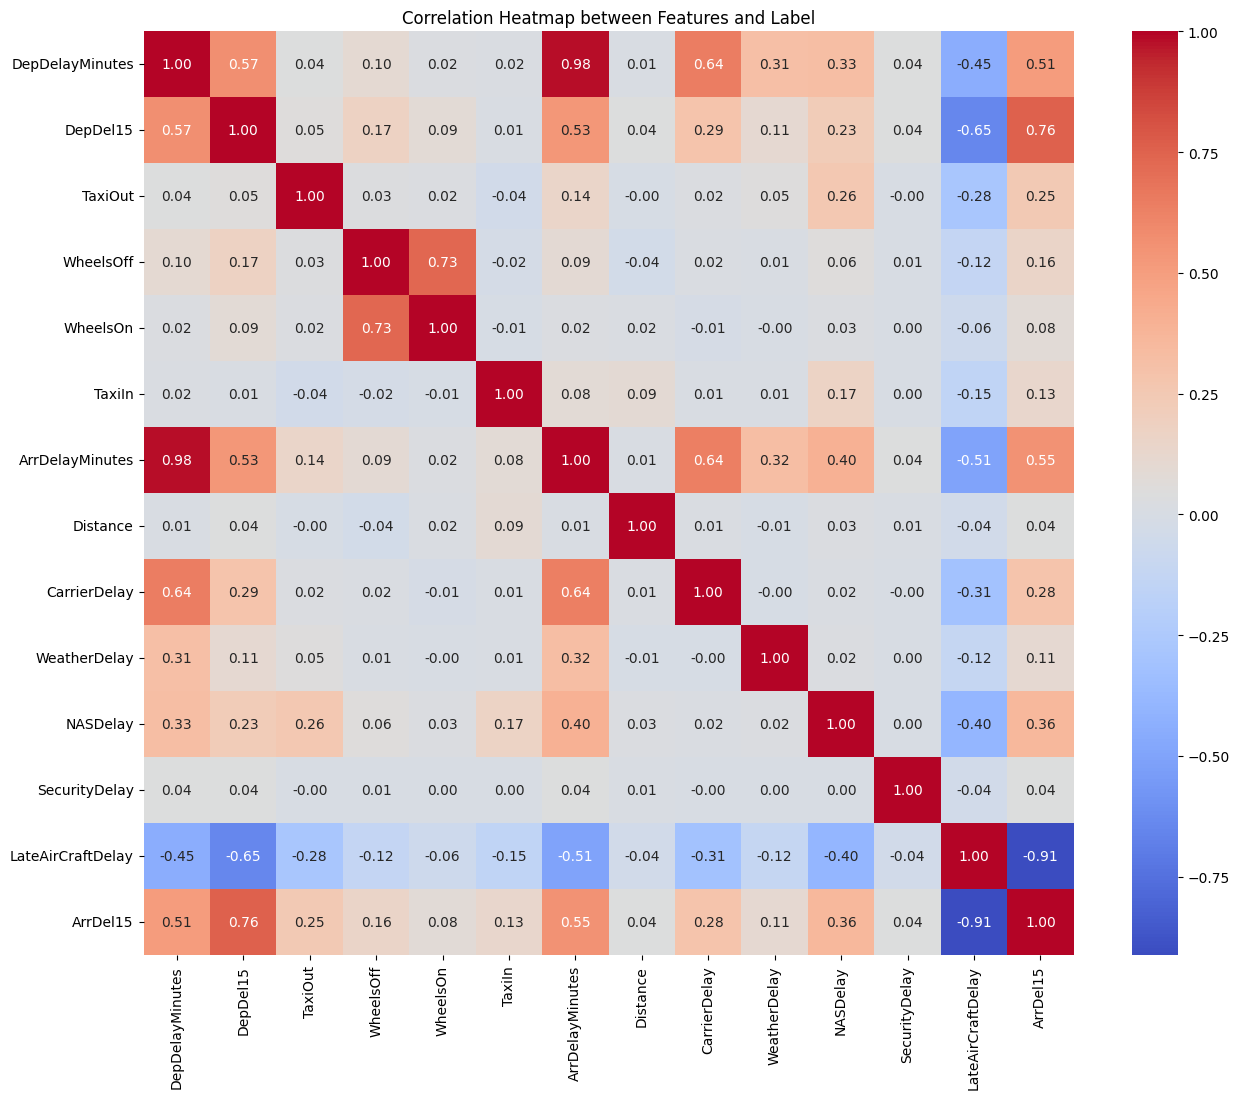

In [23]:
plt.figure(figsize=(15, 12))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap between Features and Label")
plt.show()

We decide to drop these columns because they are the reason of arrival delays or other objective of the predictive models. Therefore, putting them in the training step can cause the overfitting.

**Features to drop are: **NASDelay, SecurityDelay, LateAirCraftDelay, WeatherDelay, CarrierDelay, ArrDelayMinutes.

**Important features which have high correlation to ArrDel15:** DepDel15, DepDelayMinutes, TaxiIn, TaxiOut.

WheelsOn and WheelsOff have high correlation with each other, therefore, we select one of these two features in model training step - WheelsOff as it has the higher correlation to ArrDel15. We also drop WheelsOn variable.

**Distance and arrival delay**

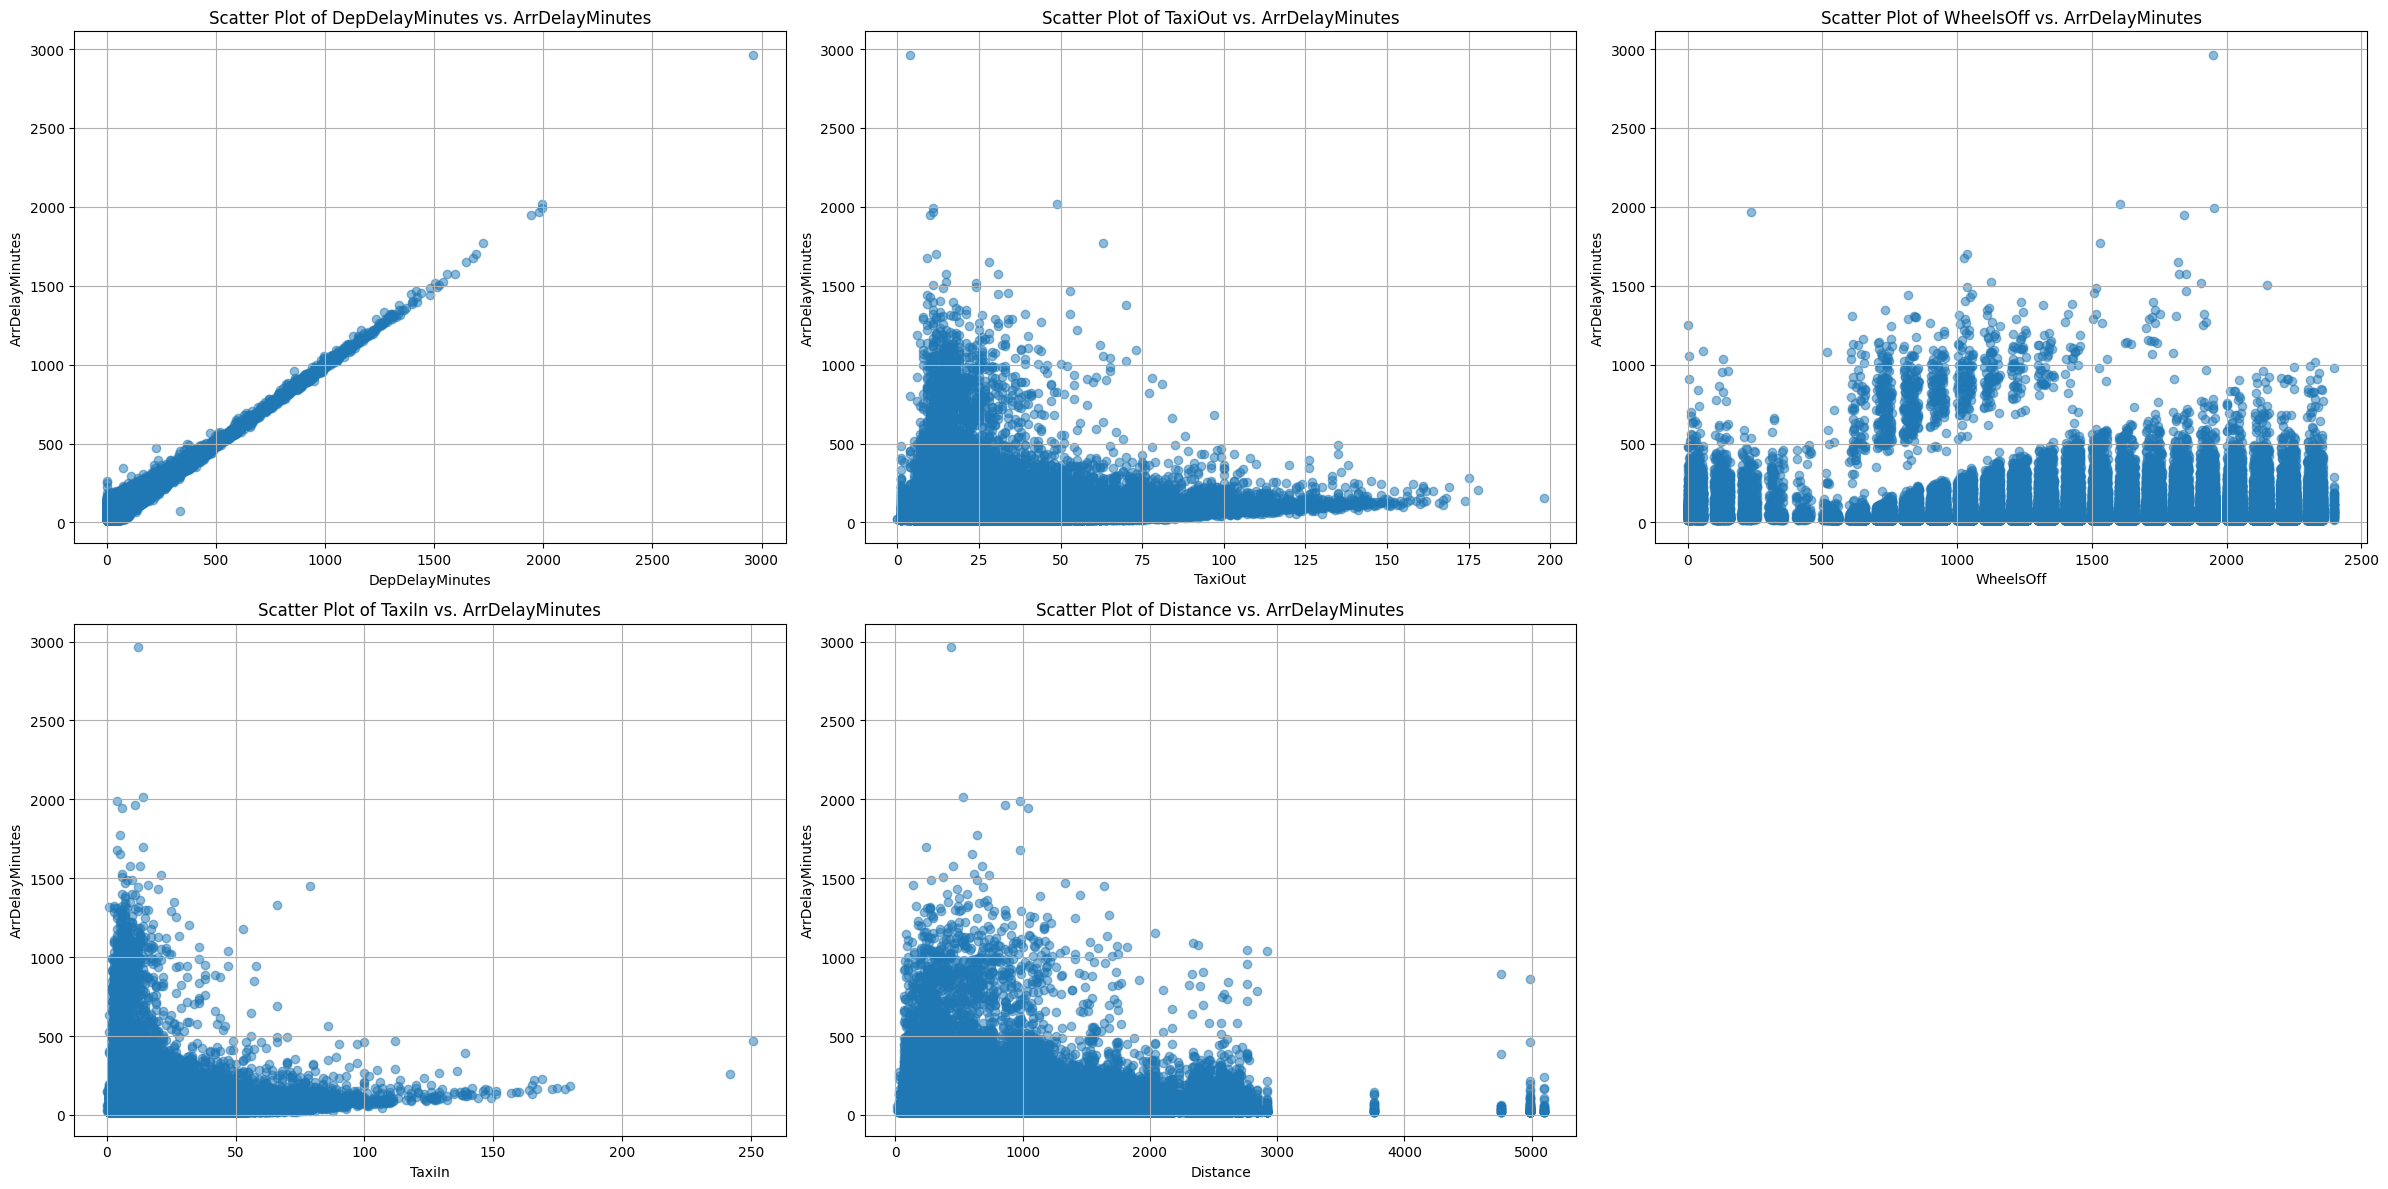

In [24]:
feature_for_scatter = ['DepDelayMinutes', 'TaxiOut', 'WheelsOff', 'TaxiIn', 'Distance']

# Filter the data for ArrDelayMinutes > 15
filtered_data = df[df['ArrDelayMinutes'] > 15]

# Subsample a fraction of the data
subsampled_data = filtered_data.sample(frac=0.1)  # Adjust the fraction as needed

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 12))

# Create scatter plots for each feature vs. ArrDelayMinutes
for i, feature in enumerate(feature_for_scatter):
    ax = axes[i // 3, i % 3]  # Calculate row and column index for subplots
    ax.scatter(subsampled_data[feature], subsampled_data['ArrDelayMinutes'], alpha=0.5)
    ax.set_title(f"Scatter Plot of {feature} vs. ArrDelayMinutes")
    ax.set_xlabel(feature)
    ax.set_ylabel("ArrDelayMinutes")
    ax.grid(True)

# Remove any unused subplots
for i in range(len(feature_for_scatter), 6):
    fig.delaxes(axes[i // 3, i % 3])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

**Reason for delay**

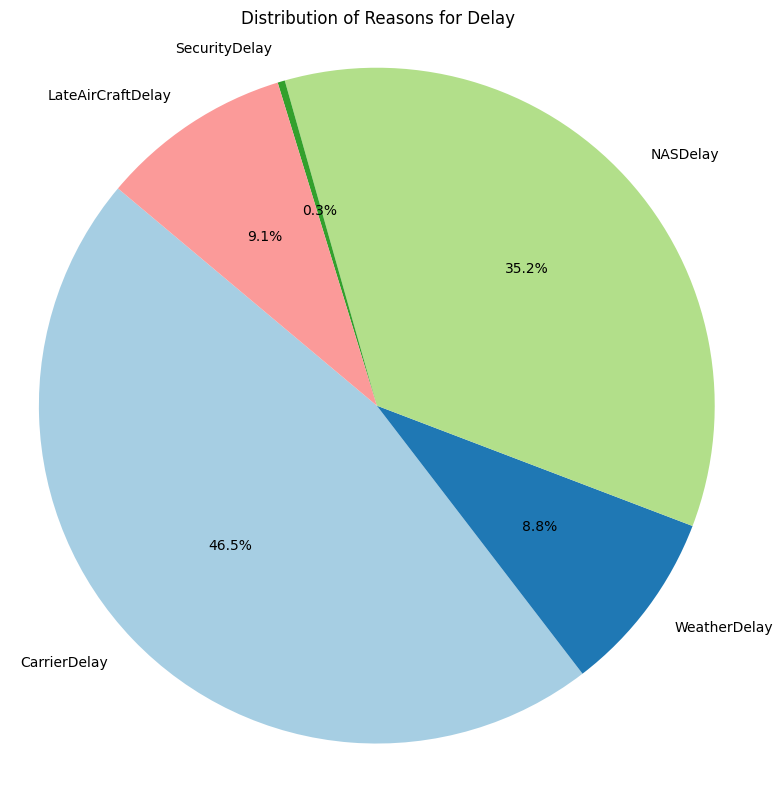

In [25]:
delay_reasons = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAirCraftDelay']
total_delays = df[delay_reasons].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_delays, labels=delay_reasons, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribution of Reasons for Delay")
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Display the plot
plt.tight_layout()
plt.show()

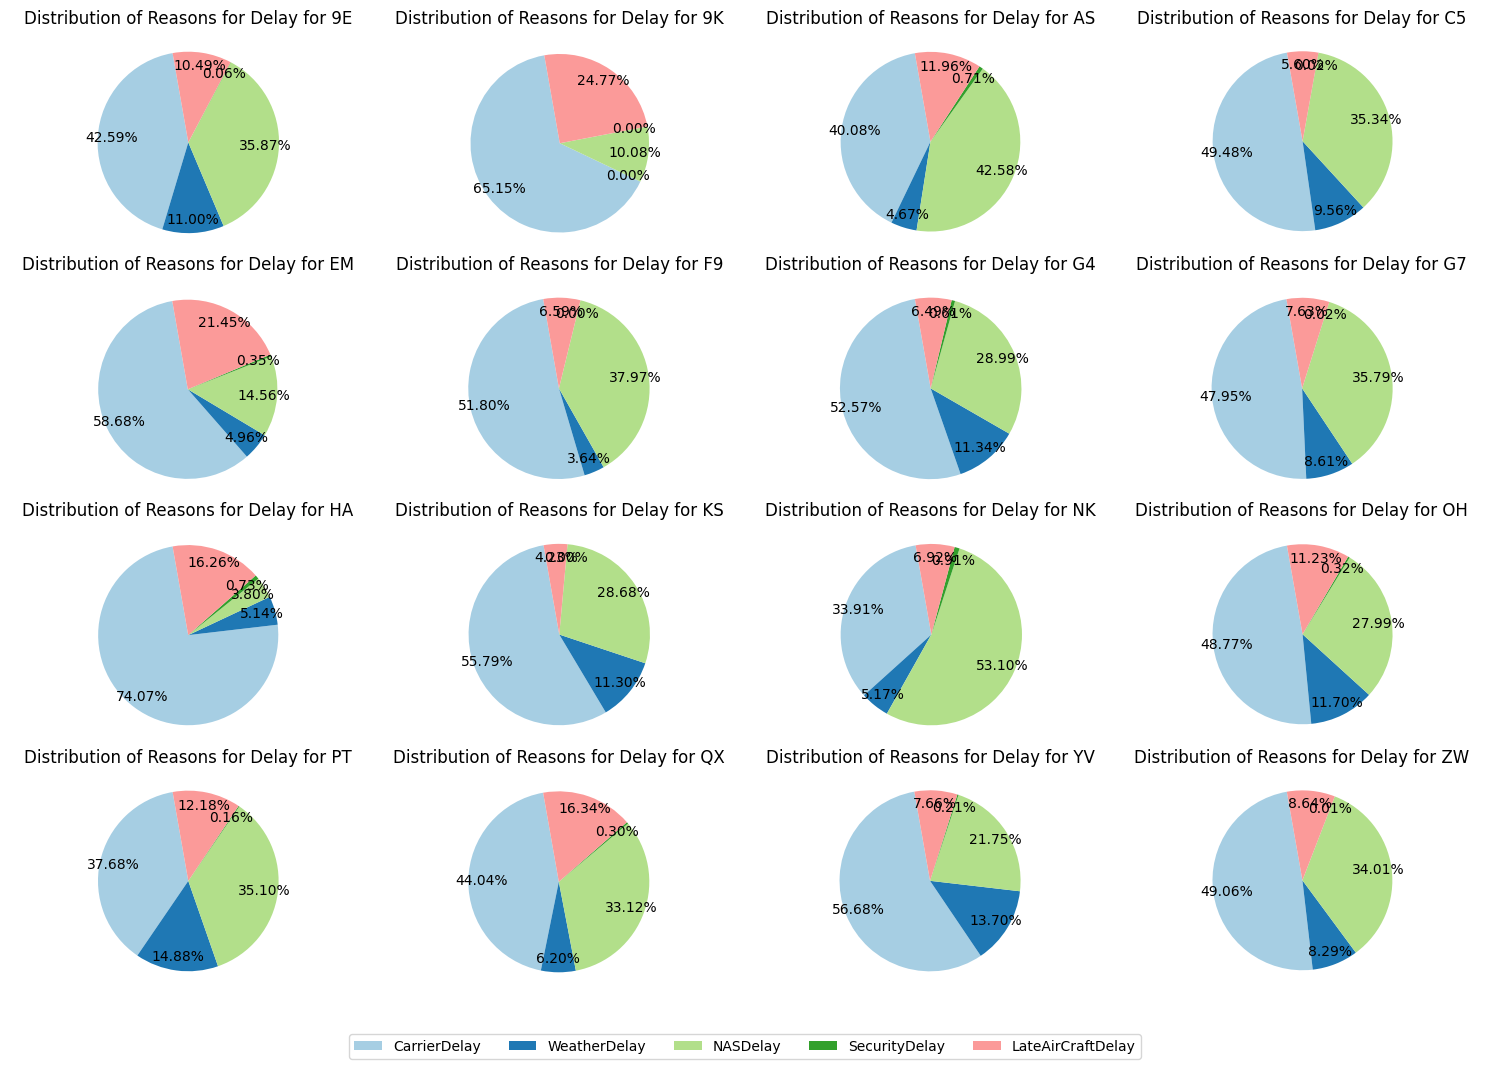

In [26]:
# Group the data by airline and calculate the sum of delays for each reason
grouped = df.groupby('Operating_Airline')[delay_reasons].sum()

# Calculate the number of rows and columns for the subplots
num_rows = 4
num_cols = 4

# Create a big figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create pie charts for each airline
for i, airline in enumerate(grouped.index):
    ax = axes[i]
    delays = grouped.loc[airline]
    wedges, texts, autotexts = ax.pie(delays, labels=None, autopct='%0.2f%%', startangle=100, colors=plt.cm.Paired.colors, pctdistance=0.85)
    ax.set_title(f"Distribution of Reasons for Delay for {airline}", y=1.05)  # Adjust the distance between title and plot
    ax.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Remove any unused subplots
for i in range(len(grouped), num_rows * num_cols):
    fig.delaxes(axes[i])

# Create a legend outside the subplots
fig.legend(labels=delay_reasons, loc='center', bbox_to_anchor=(0.5, -0.05), ncol=len(delay_reasons))

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### 2. Categorical features and label

**Tail number and arrival delay**

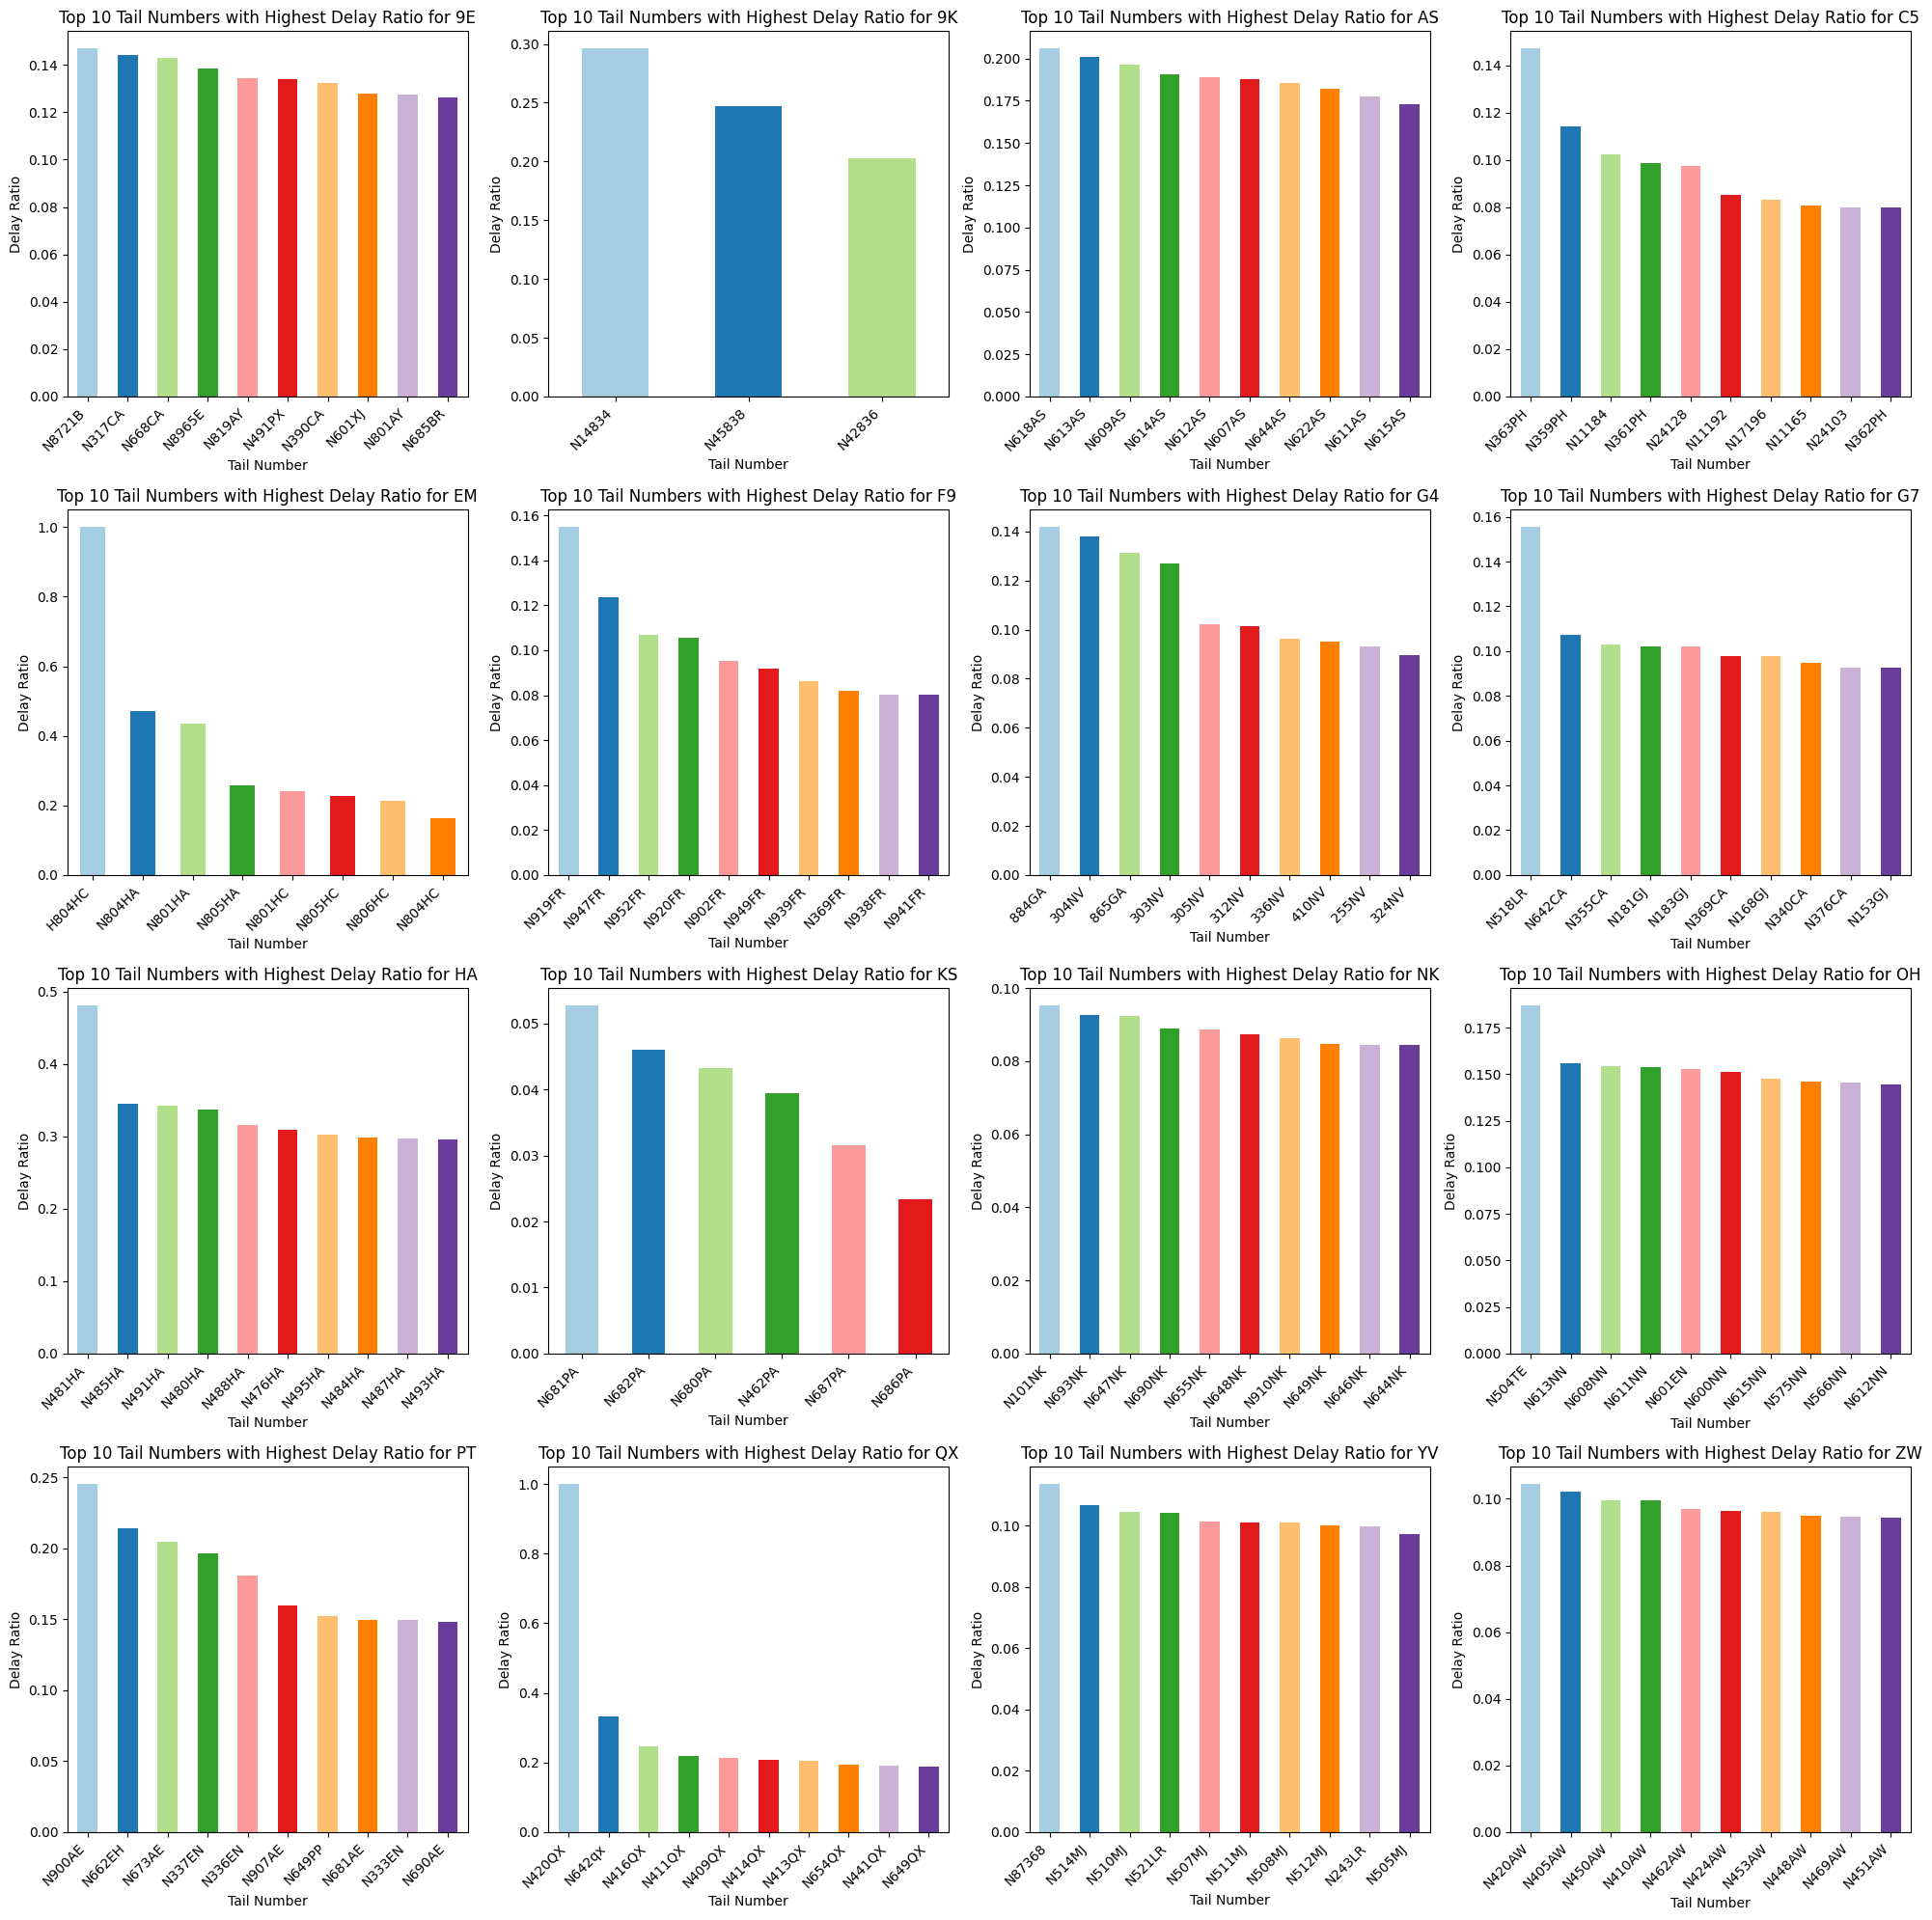

In [27]:
# Calculate the delay ratio for each tail number within each airline
grouped = df.groupby(['Operating_Airline', 'Tail_Number'])[delay_reasons].sum()
delay_ratio = grouped.div(grouped.sum(axis=1), axis=0)['LateAirCraftDelay']

# Create a big figure with subplots
num_rows = 4
num_cols = 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))
axes = axes.flatten()

# Plot the top 10 tail numbers with highest delay ratio for each airline
for i, airline in enumerate(delay_ratio.index.levels[0]):
    ax = axes[i]
    top_tail_numbers = delay_ratio.loc[airline].nlargest(10)
    top_tail_numbers.plot(kind='bar', ax=ax, color=plt.cm.Paired.colors)
    ax.set_title(f"Top 10 Tail Numbers with Highest Delay Ratio for {airline}")
    ax.set_xlabel("Tail Number")
    ax.set_ylabel("Delay Ratio")
    ax.set_xticklabels(top_tail_numbers.index, rotation=45, ha='right')

# Remove any unused subplots
for i in range(len(delay_ratio.index.levels[0]), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

**Month and arrival delay**

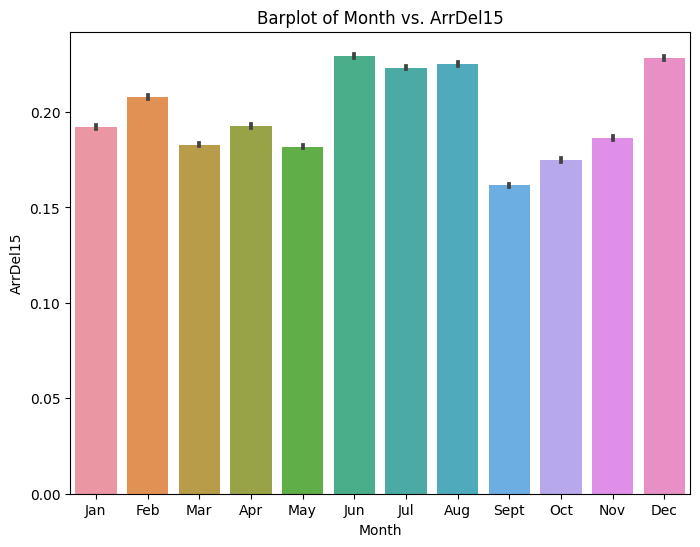

In [28]:
feature = "Month"
desired_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov","Dec"]
plt.figure(figsize=(8,6))
sns.barplot(data=df, x=feature, y=label_column, order=desired_order)
plt.title(f"Barplot of {feature} vs. {label_column}")
plt.ylabel(label_column)
plt.show()

**Day of week vs arrival delay**

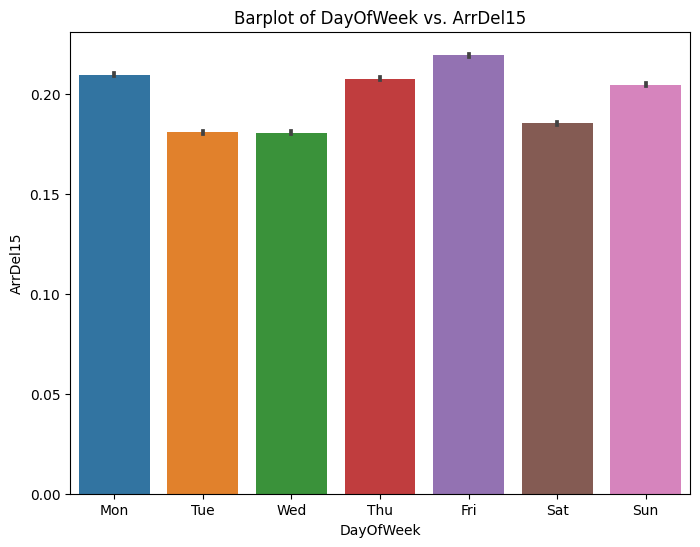

In [29]:
# Assuming these are your variables
feature = "DayOfWeek"  # Replace this with your actual feature column
label_column = "ArrDel15"  # Replace this with your actual label column
desired_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x=feature, y=label_column, order=desired_order)
plt.title(f"Barplot of {feature} vs. {label_column}")
plt.ylabel(label_column)
plt.show()

**Origin Airport vs arrival delay**

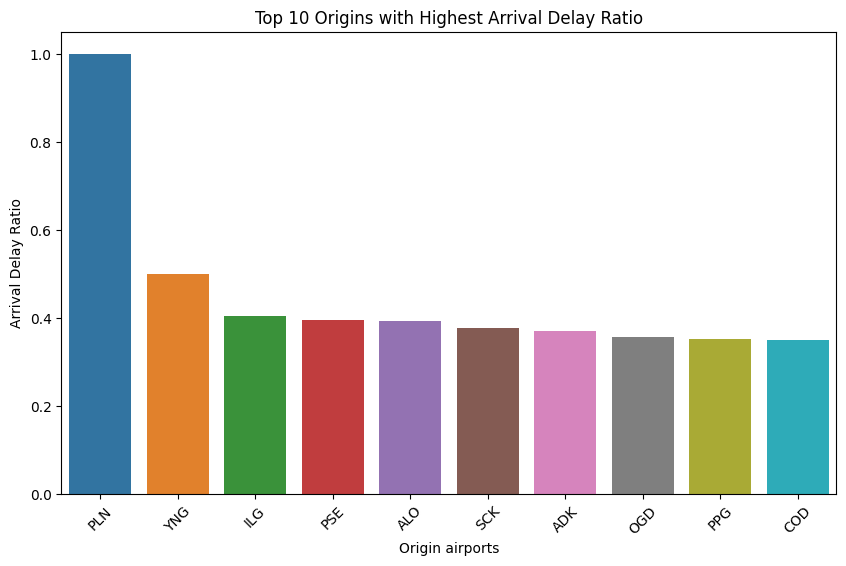

In [30]:
delay_ratio = df.groupby('Origin')['ArrDel15'].mean()

# Sort origins based on delay ratio
sorted_origins = delay_ratio.sort_values(ascending=False)

# Select top 10 origins
top_10_origins = sorted_origins.head(10)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_origins.index, y=top_10_origins.values)
plt.title("Top 10 Origins with Highest Arrival Delay Ratio")
plt.xlabel("Origin airports")
plt.ylabel("Arrival Delay Ratio")
plt.xticks(rotation=45)
plt.show()

**Dest airport vs arrival delay**

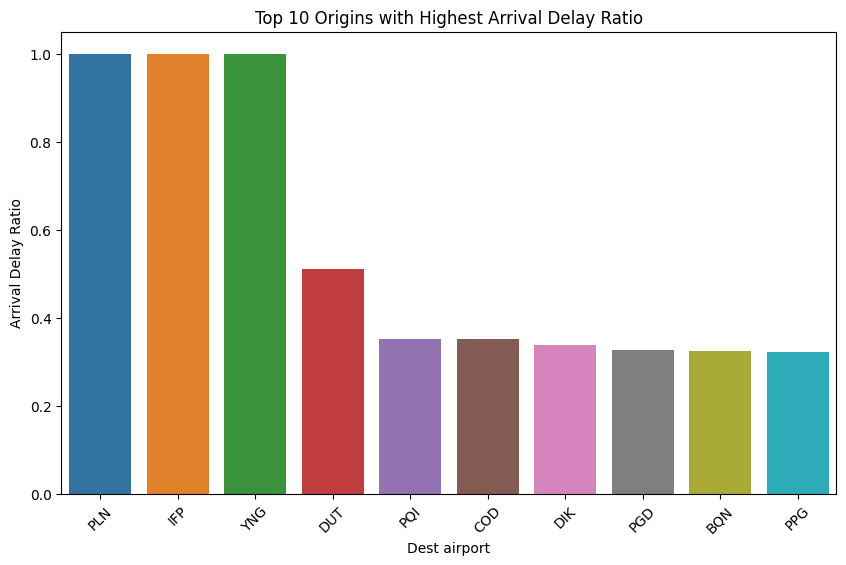

In [31]:
delay_ratio = df.groupby('Dest')['ArrDel15'].mean()

# Sort origins based on delay ratio
sorted_origins = delay_ratio.sort_values(ascending=False)

# Select top 10 origins
top_10_origins = sorted_origins.head(10)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_origins.index, y=top_10_origins.values)
plt.title("Top 10 Origins with Highest Arrival Delay Ratio")
plt.xlabel("Dest airport")
plt.ylabel("Arrival Delay Ratio")
plt.xticks(rotation=45)
plt.show()

In [32]:
df['Itinerary'] = df.apply(lambda row: f"{row['Origin']} - {row['Dest']}", axis=1)

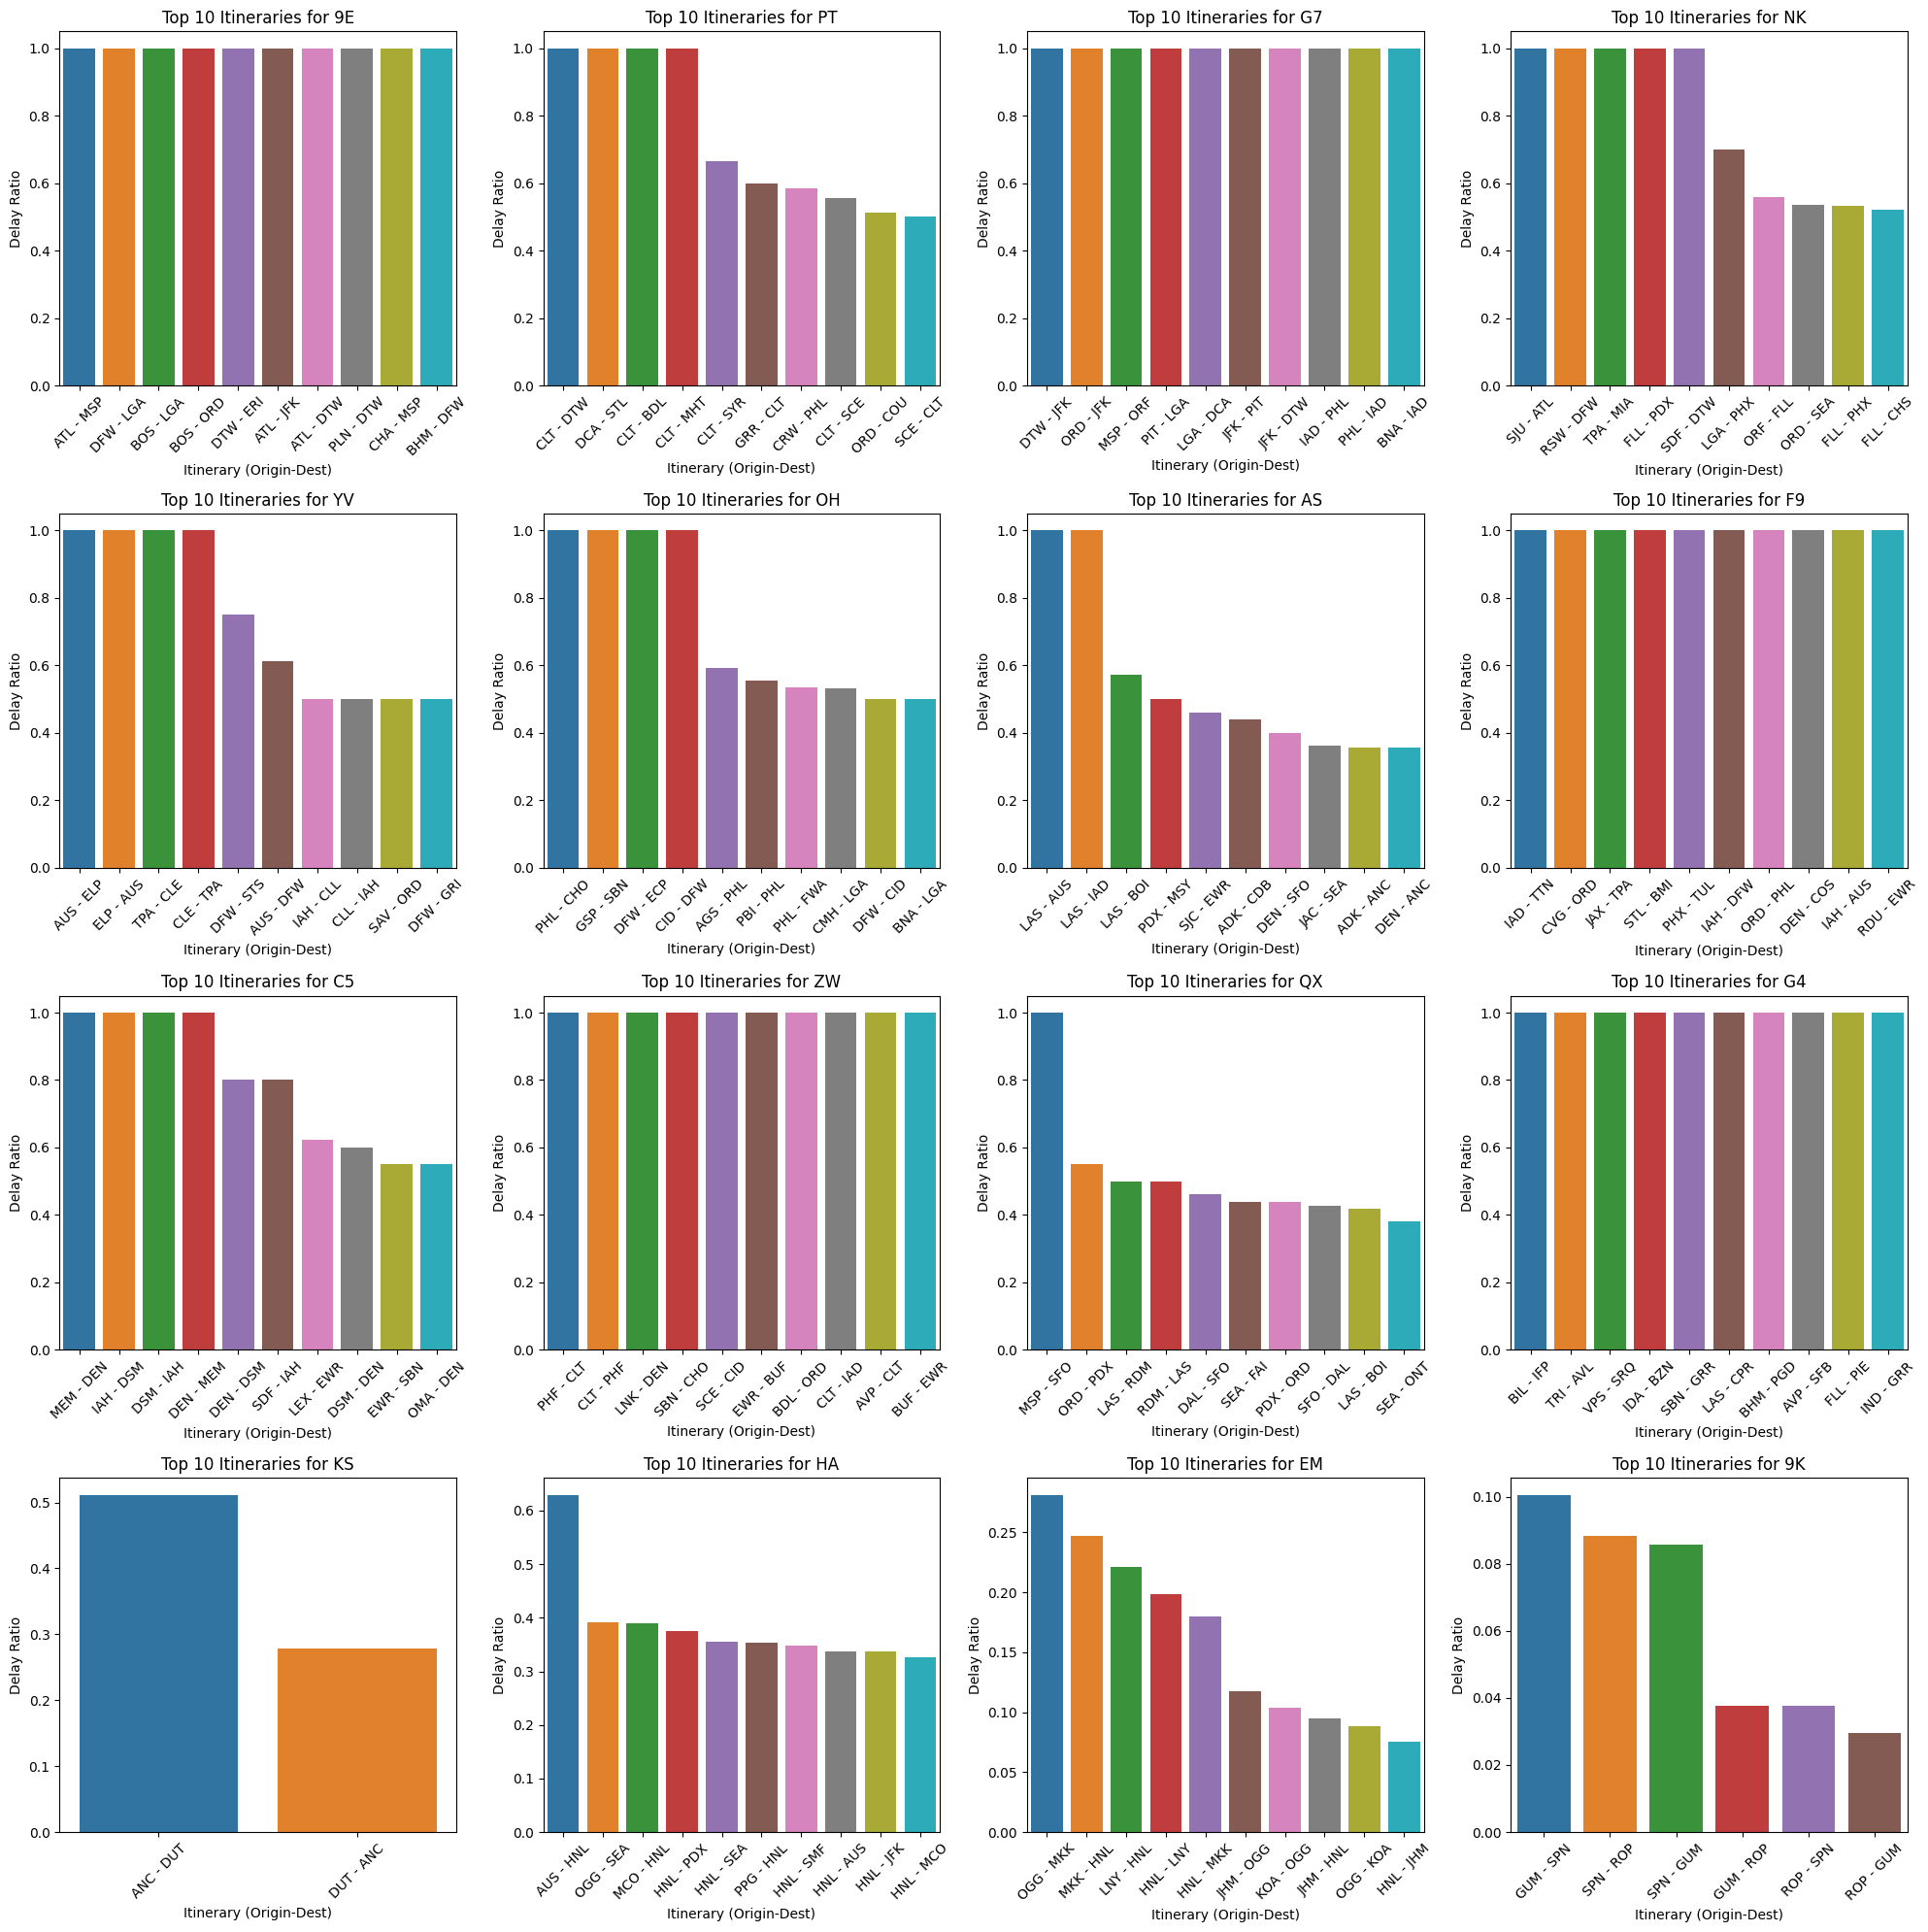

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
airlines = df['Operating_Airline'].unique()

# Create a big figure
fig = plt.figure(figsize=(20, 20))  # Adjust size as needed

# Counter to keep track of where to place the next subplot
plot_num = 1

for airline in airlines:
    # Filter the data for the current airline
    airline_df = df[df['Operating_Airline'] == airline]
    
    # Calculate arrival delay ratio for each itinerary
    delay_ratio = airline_df.groupby('Itinerary')['ArrDel15'].mean()
    
    # Sort itineraries based on delay ratio
    sorted_itineraries = delay_ratio.sort_values(ascending=False)
    
    # Select top 10 itineraries
    top_10_itineraries = sorted_itineraries.head(10)
    
    # Plot the results on the grid
    ax = fig.add_subplot(4, 4, plot_num)  # 4x4 grid
    sns.barplot(x=top_10_itineraries.index, y=top_10_itineraries.values, ax=ax)
    ax.set_title(f"Top 10 Itineraries for {airline}")
    ax.set_xlabel("Itinerary (Origin-Dest)")
    ax.set_ylabel("Delay Ratio")
    ax.tick_params(axis='x', rotation=45)
    
    plot_num += 1

plt.tight_layout()
plt.show()
